# Save TC genesis

This code is used together with Plot_TC_track_ace2.ipynb

2024.12.4
Mu-Ting Chien

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.util as cartopy_util
import cartopy.crs as ccrs
from netCDF4 import Dataset
import os

In [15]:
DIR = '/barnes-engr-scratch1/c832572266/'
dir_in = DIR + 'data_output/ace2/ace2_tempex/StichNodes/'
expname_list = list(['ace2'])
fig_dir_era5 = DIR + 'figure/era5_TC/'
fig_dir = DIR + 'figure/ace2_fig/TC/'
os.makedirs(fig_dir_era5, exist_ok=True)
file_dir_multi_yr = DIR + 'data_output/ace2/ace2_output/10yr/'

In [11]:
# Define a function to detect headers (customize this logic for your case)
def is_header(line):
    # Example: Headers start with "start"
    return line.strip().startswith("start")

In [13]:
for first_time_execution in range(1,-1,-1):
    print(first_time_execution)
    for icase in range(0,1):
        expname = expname_list[icase]
        fig_dir = DIR + 'figure/ace2_fig/TC/'
        os.makedirs(fig_dir, exist_ok=True)

        # Name of the sub directory for the data named "filename"
        dir_sub_list = list(['yr1','yr2-5','yr6-10'])

        nsub = np.size(dir_sub_list)
        for imem in range(0, 1):#nmem):
            mem_str = f"{imem+1:02d}"
            for isub in range(0, nsub):
                yrname = dir_sub_list[isub]

                filename = 'tracks.ACE2.TC.'+mem_str+'.'+yrname+'.txt'

                # Define expected number of columns in your data rows
                expected_columns = 12  # Adjust this based on your actual data

                # Define a list to hold valid data rows
                data_rows = []

                print(dir_in+filename)

                # Read file line by line
                with open(dir_in+filename, "r") as file:
                    
                    lines = file.readlines()
                    #print(lines)
                    for i, line in enumerate(lines):
                        if is_header(line):  # Detect a header
                            #print('is_header!')
                            if i + 1 < len(lines):  # Ensure the next line exists
                                next_line = lines[i + 1].strip()
                                # Split the next line into columns
                                columns = next_line.split()  # Customize split logic if needed
                                #print('columns:',columns)
                                
                                data_rows.append(columns)  # Only append if it's the next line of header                    

                # Convert the filtered rows to a DataFrame
                data = pd.DataFrame(data_rows, dtype=float)


                # If you want to assign each column to a separate variable
                lon_TC, lat_TC, mslp, vmax, hsfc, vmax_10m = data[2], data[3], data[4], data[5], data[6], data[7]  # Adjust depending on the number of columns
                yr, mon, day, hr           = data[8], data[9], data[10], data[11]

                if isub == 0:
                    ist = 0
                    if first_time_execution == 1:
                        TC_genesis = np.empty(nsub, dtype=int)
                TC_genesis[isub] = np.size(lon_TC)

                if first_time_execution == 0:
                    ntc = np.sum(TC_genesis)
                    print('Number of TC snapshot:',ntc)
                    if isub == 0:
                        lon_TC_all = np.empty([ntc]) #note that 4916 is the sum of TC_snapshot for 3 years, change this if different exp (mem)
                        lat_TC_all = np.empty([ntc])
                        mslp_all = np.empty([ntc])
                        vmax_all = np.empty([ntc])
                        vmax_10m_all = np.empty([ntc])
                        hsfc_all = np.empty([ntc])
                        yr_all = np.empty([ntc])
                        mon_all = np.empty([ntc])
                        day_all = np.empty([ntc])
                        hr_all = np.empty([ntc])

                    lon_TC_all[ist:ist+TC_genesis[isub]] = lon_TC
                    lat_TC_all[ist:ist+TC_genesis[isub]] = lat_TC
                    mslp_all[ist:ist+TC_genesis[isub]] = mslp
                    vmax_all[ist:ist+TC_genesis[isub]] = vmax
                    vmax_10m_all[ist:ist+TC_genesis[isub]] = vmax_10m
                    hsfc_all[ist:ist+TC_genesis[isub]] = hsfc
                    yr_all[ist:ist+TC_genesis[isub]] = yr
                    mon_all[ist:ist+TC_genesis[isub]] = mon
                    day_all[ist:ist+TC_genesis[isub]] = day
                    hr_all[ist:ist+TC_genesis[isub]] = hr

                ist = ist + TC_genesis[isub]
            ntc = np.sum(TC_genesis)

# Save data
np.savez(file_dir_multi_yr+'TC_genesis_10yr_ace2.npz', lon_TC = lon_TC_all, lat_TC=lat_TC_all, mslp=mslp_all, vmax=vmax_all,\
         vmax_10m=vmax_10m_all, hsfc=hsfc_all, yr=yr_all, mon=mon_all, day=day_all, hr=hr_all)

1
/barnes-engr-scratch1/c832572266/data_output/ace2/ace2_tempex/StichNodes/tracks.ACE2.TC.01.yr1.txt
/barnes-engr-scratch1/c832572266/data_output/ace2/ace2_tempex/StichNodes/tracks.ACE2.TC.01.yr2-5.txt
/barnes-engr-scratch1/c832572266/data_output/ace2/ace2_tempex/StichNodes/tracks.ACE2.TC.01.yr6-10.txt
0
/barnes-engr-scratch1/c832572266/data_output/ace2/ace2_tempex/StichNodes/tracks.ACE2.TC.01.yr1.txt
Number of TC snapshot: 524
/barnes-engr-scratch1/c832572266/data_output/ace2/ace2_tempex/StichNodes/tracks.ACE2.TC.01.yr2-5.txt
Number of TC snapshot: 524
/barnes-engr-scratch1/c832572266/data_output/ace2/ace2_tempex/StichNodes/tracks.ACE2.TC.01.yr6-10.txt
Number of TC snapshot: 524


In [19]:
print(lon_TC_all)

[ 63.5  72.5  89.5  92.5  73.5  51.5 117.5  68.5 207.5 172.5  56.5 218.5
 178.5 310.5 132.5  90.5 117.5  90.5 314.5  73.5  51.5 222.5 142.5 251.5
 258.5 142.5 151.5  47.5 160.5 243.5 250.5 154.5 251.5 332.5  83.5 145.5
 305.5 241.5 252.5 298.5 156.5 256.5 151.5 257.5 330.5 166.5 151.5 223.5
 189.5 230.5 295.5 146.5  88.5 150.5 140.5 140.5  84.5 131.5  68.5 216.5
  92.5 166.5 179.5 175.5 200.5 118.5 133.5 113.5 170.5 167.5  88.5  69.5
  89.5 151.5 136.5 240.5 185.5 129.5 201.5 155.5 327.5 164.5 285.5  81.5
 131.5 151.5 339.5 161.5 257.5 147.5 248.5 167.5 251.5 154.5 140.5 158.5
 169.5 226.5 250.5 231.5 149.5 155.5 254.5 135.5 299.5 139.5  92.5 148.5
 151.5  84.5 165.5  86.5 193.5 161.5  82.5  69.5 166.5 172.5 112.5 174.5
  67.5  44.5  90.5 181.5 166.5  63.5 194.5 182.5 157.5 175.5 103.5 140.5
 342.5 253.5  70.5 264.5 149.5 208.5 137.5 256.5 157.5 243.5 257.5 144.5
 320.5 141.5 141.5 237.5 148.5 311.5 159.5 143.5 158.5 167.5 245.5 136.5
 231.5 282.5 302.5 207.5 165.5 128.5 266.5 191.5 23

In [14]:
lon_TC_adj = np.where(lon_TC_all>180, -360+lon_TC_all, lon_TC_all)

In [17]:
# Load normal lon and lat 
file = DIR + 'data_output/ace_forcing/HGTsfc.nc'
data = xr.open_dataset(file)
lon = data['lon']
lat = data['lat']

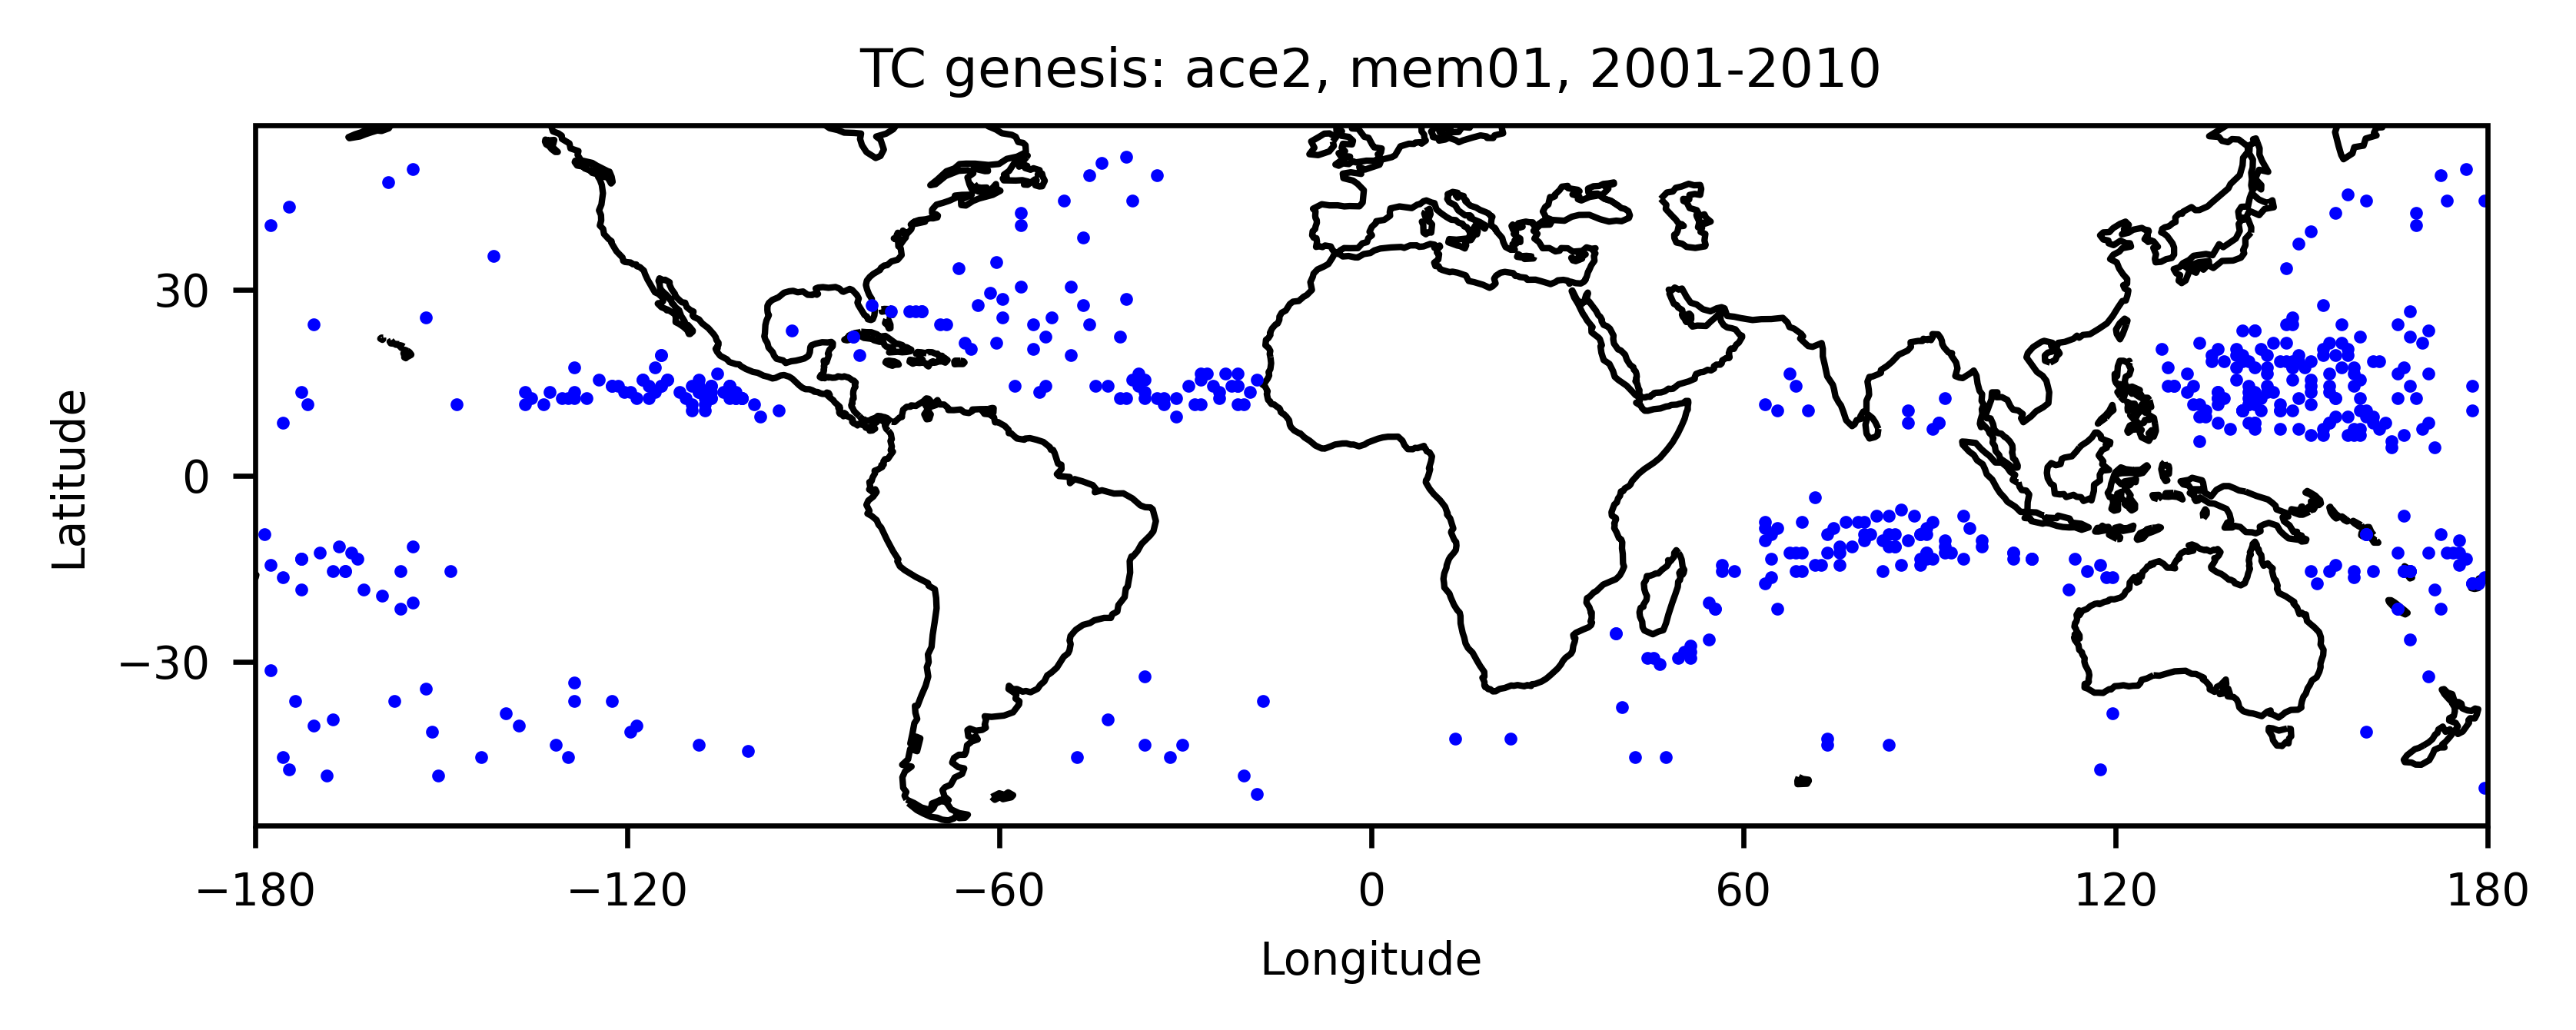

In [18]:
# Plot TC genesis map
for i in range(0,1):
    fig_name = 'Fig.5_TCgenesis_mem'+mem_str+'yr1-10.png' #'_'+yrname+'.png'

    fig, ax = plt.subplots(1,1,figsize=(5.5, 3.5),dpi=600, subplot_kw={'projection':ccrs.PlateCarree()} )
    plt.subplots_adjust(left=0.1, right=0.98,top=0.9,bottom=0.15,hspace=0.3, wspace=0.1)
    plt.rcParams.update({'font.size': 7})

    [xx, yy] = np.meshgrid(lon, lat)
    ax.coastlines()
    ax.set_xticks(np.arange(-180,240,60), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90,120,30), crs=ccrs.PlateCarree())

    plt.plot(lon_TC_adj, lat_TC_all, 'bo', markersize=1)
    plt.title('TC genesis: '+expname+', mem'+mem_str+', 2001-2010')#+yrname)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(fig_dir+fig_name,format='png', dpi=600)
    plt.show()

In [21]:
# Load ERA5 TC data (from Jihong: UW server: /home/disk/eos4/moon/tempex/sensitivity/ERA5TC/StitchNodes/)

nyr = 10
#dir_in_era5 = DIR + 'data_output/TC_ERA5/'
dir_in_era5 = DIR + 'data_output/ERA5TC_fromJihong/'
for first_time_execution in range(1,-1,-1):
    for iyr in range(0, nyr):
        yrname = str(iyr+2001)
        filename = 'tracks.ERA5TC.'+yrname+'.txt'

        # Define expected number of columns in your data rows
        expected_columns = 11  # Adjust this based on your actual data

        # Define a list to hold valid data rows
        data_rows = []

        # Read file line by line
        with open(dir_in_era5+filename, "r") as file:
                    
            lines = file.readlines()
            #print(lines)
            for i, line in enumerate(lines):
                if is_header(line):  # Detect a header
                    #print('is_header!')
                    if i + 1 < len(lines):  # Ensure the next line exists
                        next_line = lines[i + 1].strip()
                        # Split the next line into columns
                        columns = next_line.split()  # Customize split logic if needed
                        #print('columns:',columns)
                                
                        data_rows.append(columns)  # Only append if it's the next line of header

        # Convert the filtered rows to a DataFrame
        data = pd.DataFrame(data_rows, dtype=float)


        # If you want to assign each column to a separate variable
        lon_TC, lat_TC, mslp, vmax, hsfc = data[2], data[3], data[4], data[5], data[6]  # Adjust depending on the number of columns
        yr, mon, day, hr           = data[7], data[8], data[9], data[10]

        
        if iyr == 0:
            ist = 0
            TC_snapshot = np.empty([nyr], dtype=int)
        TC_snapshot[iyr] = np.size(lon_TC)

        if first_time_execution == 0:
            
            if iyr == 0:
                lon_TC_era5 = np.empty([ntc_era5]) #note that 4916 is the sum of TC_snapshot for 3 years, change this if different exp (mem)
                lat_TC_era5 = np.empty([ntc_era5])
                mslp_era5 = np.empty([ntc_era5])
                vmax_era5 = np.empty([ntc_era5])
                hsfc_era5 = np.empty([ntc_era5])
                yr_era5 = np.empty([ntc_era5])
                mon_era5 = np.empty([ntc_era5])
                day_era5 = np.empty([ntc_era5])
                hr_era5 = np.empty([ntc_era5])

            lon_TC_era5[ist:ist+TC_snapshot[iyr]] = lon_TC
            lat_TC_era5[ist:ist+TC_snapshot[iyr]] = lat_TC
            mslp_era5[ist:ist+TC_snapshot[iyr]] = mslp
            vmax_era5[ist:ist+TC_snapshot[iyr]] = vmax
            hsfc_era5[ist:ist+TC_snapshot[iyr]] = hsfc
            yr_era5[ist:ist+TC_snapshot[iyr]] = yr
            mon_era5[ist:ist+TC_snapshot[iyr]] = mon
            day_era5[ist:ist+TC_snapshot[iyr]] = day
            hr_era5[ist:ist+TC_snapshot[iyr]] = hr

        ist = ist + TC_snapshot[iyr]
    
    if first_time_execution == 1:
        ntc_era5 = np.sum(TC_snapshot)
        print(ntc_era5)

813


In [22]:
# Save data
np.savez(file_dir_multi_yr+'TC_genesis_era5_2001-2010.npz', lon_TC = lon_TC_era5, lat_TC=lat_TC_era5, \
         mslp=mslp_era5, vmax=vmax_era5,\
         hsfc=hsfc_era5, yr=yr_era5, mon=mon_era5, day=day_era5, hr=hr_era5)

In [23]:
lon_TC_era5_adj = np.where(lon_TC_era5>180, -360+lon_TC_era5, lon_TC_era5)

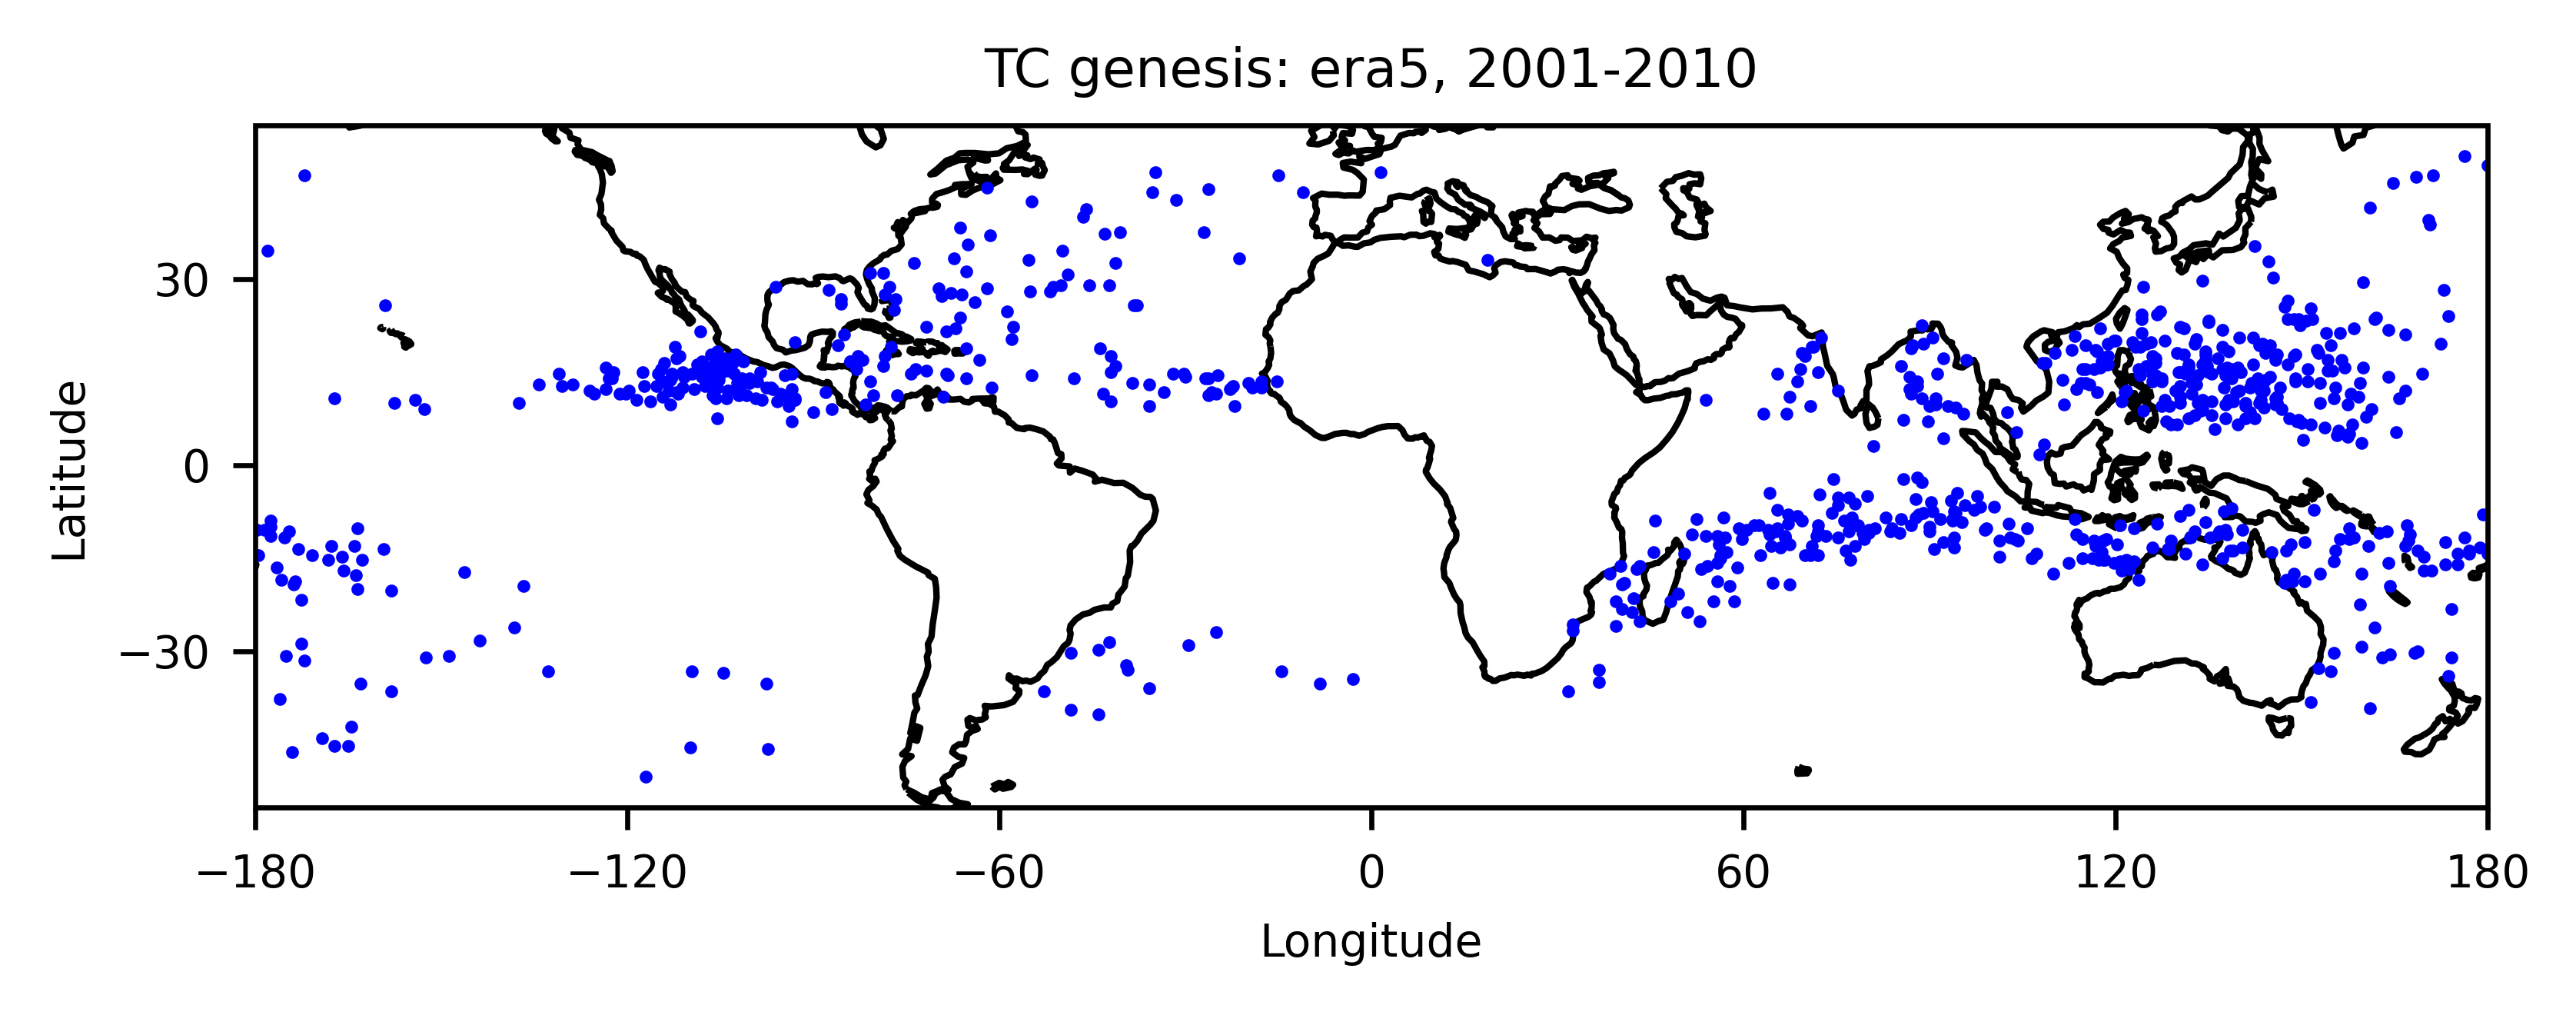

In [24]:
# Plot TC genesis map
for i in range(0,1):
    fig_name = 'Fig.5_TCgenesis_era5_2001-2010.png' #'_'+yrname+'.png'

    fig, ax = plt.subplots(1,1,figsize=(5.5, 3.5),dpi=600, subplot_kw={'projection':ccrs.PlateCarree()} )
    plt.subplots_adjust(left=0.1, right=0.98,top=0.9,bottom=0.15,hspace=0.3, wspace=0.1)
    plt.rcParams.update({'font.size': 7})

    [xx, yy] = np.meshgrid(lon, lat)
    ax.coastlines()
    ax.set_xticks(np.arange(-180,240,60), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90,120,30), crs=ccrs.PlateCarree())

    plt.plot(lon_TC_era5_adj, lat_TC_era5, 'bo', markersize=1)
    plt.title('TC genesis: era5, 2001-2010')#+yrname)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(fig_dir+fig_name,format='png', dpi=600)
    plt.show()